In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
%matplotlib inline

In [1]:
!pip install fastai==0.7.0

    100% |████████████████████████████████| 122kB 4.6MB/s ta 0:00:01
    100% |████████████████████████████████| 496.4MB 48kB/s  eta 0:00:01   10% |███▍                            | 52.6MB 64.2MB/s eta 0:00:07    50% |████████████████                | 249.7MB 66.8MB/s eta 0:00:04    59% |███████████████████▏            | 296.5MB 68.9MB/s eta 0:00:03    79% |█████████████████████████▍      | 393.3MB 71.4MB/s eta 0:00:02    88% |████████████████████████████▍   | 440.8MB 23.3MB/s eta 0:00:03


  Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0
  Found existing installation: fastai 1.0.39
    Uninstalling fastai-1.0.39:
      Successfully uninstalled fastai-1.0.39
You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [10]:

df= pd.read_csv('../input/churn.csv', low_memory=False)


In [12]:
df.head().T

,0,1,2,3,4
college,zero,one,one,zero,one
income,31953,36147,27273,120070,29215
overage,0,0,230,38,208
leftover,6,13,0,33,85
house,313378,800586,305049,788235,224784
handset_price,161,244,201,780,241
over_15mins_calls_per_month,0,0,16,3,21
average_call_duration,4,6,15,2,1
reported_satisfaction,unsat,unsat,unsat,unsat,very_unsat
reported_usage_level,little,little,very_little,very_high,little


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
income,20000.0,80281.44775,41680.586319,20007.0,42217.00,75366.5,115881.75,159983.0
overage,20000.0,85.97955,85.992324,-2.0,0.00,59.0,179.00,335.0
leftover,20000.0,23.89865,26.816645,0.0,0.00,14.0,41.00,89.0
house,20000.0,493155.26425,252407.884692,150002.0,263714.25,452259.5,702378.00,999996.0
handset_price,20000.0,389.61510,213.820682,130.0,219.00,326.0,533.25,899.0
over_15mins_calls_per_month,20000.0,8.00070,8.925418,0.0,1.00,4.0,15.00,29.0
average_call_duration,20000.0,6.00225,4.402558,1.0,2.00,5.0,10.00,15.0


In [15]:
train_cats(df)# we made cates in df become cates

In [17]:
df.dtypes

college                        category
income                            int64
overage                           int64
leftover                          int64
house                             int64
handset_price                     int64
over_15mins_calls_per_month       int64
average_call_duration             int64
reported_satisfaction          category
reported_usage_level           category
considering_change_of_plan     category
Leave                          category
dtype: object

In [18]:
df.reported_satisfaction.cat.categories

Index(['avg', 'sat', 'unsat', 'very_sat', 'very_unsat'], dtype='object')

In [21]:
df.reported_satisfaction.cat.set_categories(['very_unsat','unsat','avg', 'sat','very_sat'],ordered=True,inplace=True)

In [22]:
df.reported_usage_level.cat.categories

Index(['avg', 'high', 'little', 'very_high', 'very_little'], dtype='object')

In [23]:
df.reported_usage_level.cat.set_categories(['very_little','little','avg','high','very_high'],ordered=True,inplace=True)

In [24]:
df.considering_change_of_plan.cat.categories

Index(['actively_looking_into_it', 'considering', 'never_thought', 'no',
       'perhaps'],
      dtype='object')

In [25]:
#show codes
df.reported_usage_level.cat.codes

0        1
1        1
2        0
3        4
4        1
5        3
6        1
7        1
8        1
9        1
10       1
11       1
12       0
13       3
14       4
15       3
16       4
17       4
18       4
19       1
20       0
21       4
22       0
23       4
24       0
25       4
26       4
27       4
28       0
29       0
        ..
19970    4
19971    0
19972    1
19973    0
19974    4
19975    3
19976    0
19977    2
19978    0
19979    2
19980    1
19981    0
19982    4
19983    1
19984    0
19985    3
19986    0
19987    1
19988    1
19989    2
19990    1
19991    0
19992    1
19993    1
19994    1
19995    1
19996    0
19997    4
19998    1
19999    3
Length: 20000, dtype: int8

In [26]:
#outer look
df.reported_usage_level

0             little
1             little
2        very_little
3          very_high
4             little
5               high
6             little
7             little
8             little
9             little
10            little
11            little
12       very_little
13              high
14         very_high
15              high
16         very_high
17         very_high
18         very_high
19            little
20       very_little
21         very_high
22       very_little
23         very_high
24       very_little
25         very_high
26         very_high
27         very_high
28       very_little
29       very_little
            ...     
19970      very_high
19971    very_little
19972         little
19973    very_little
19974      very_high
19975           high
19976    very_little
19977            avg
19978    very_little
19979            avg
19980         little
19981    very_little
19982      very_high
19983         little
19984    very_little
19985           high
19986    very

In [28]:
os.makedirs('tmp',exist_ok=True)
df.to_feather('tmp/new')

![](http://)feature
feather

In [29]:
df=pd.read_feather('tmp/new')

/opt/conda/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  return feather.read_dataframe(path, nthreads=nthreads)


In [30]:
df,y,nas=proc_df(df,'Leave')

In [35]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19960,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
college,2,1,1,2,1,2,2,1,2,2,2,1,2,1,1,2,2,2,2,1,2,1,1,2,1,1,1,2,1,2,1,2,2,2,1,2,2,1,2,1,...,2,1,2,1,1,2,1,2,1,2,1,2,1,1,2,1,2,2,1,1,2,1,2,1,1,2,1,1,1,2,2,2,2,1,2,2,1,2,2,2
income,31953,36147,27273,120070,29215,133728,42052,84744,38171,105824,20120,50939,23553,143501,36940,159902,45482,41513,53391,52308,129795,86658,96390,23322,26224,47502,62951,42647,39654,101335,53769,43107,80136,20381,150692,158937,134424,153885,122010,20389,...,108595,148902,145024,154591,53284,87440,100371,139799,91244,49663,74652,83907,22472,42722,75160,103529,140535,57092,65169,58016,48756,98254,95390,76286,94334,125159,22255,91738,57897,24867,144413,26966,82056,94248,105890,153252,107126,78529,78674,124697
overage,0,0,230,38,208,64,224,0,0,174,43,76,244,63,259,0,82,0,74,0,0,78,251,60,49,0,45,164,72,216,0,55,0,0,184,0,51,0,0,0,...,65,0,68,210,67,155,0,179,43,221,204,76,65,0,45,205,0,55,60,97,0,0,68,0,201,149,0,0,43,0,165,0,244,0,73,0,71,0,47,0
leftover,6,13,0,33,85,48,0,20,7,18,0,13,0,0,0,20,6,15,69,50,0,15,14,0,75,0,10,0,28,0,26,11,0,23,0,18,0,18,0,0,...,22,30,9,50,0,35,0,14,0,0,24,14,66,14,24,5,60,42,25,10,10,0,11,0,46,43,0,83,80,0,80,0,11,0,7,23,82,66,41,0
house,313378,800586,305049,788235,224784,632969,697949,688098,274218,153560,623166,587207,926178,515444,979303,213299,607518,214276,599957,187864,281839,150852,221453,281214,282685,507873,403085,459225,951514,414892,428647,300669,210851,981435,671805,560905,182350,947313,265954,277834,...,231163,205617,448534,191183,634281,569763,768774,265766,861368,598536,675943,250034,628649,642778,176206,179143,669707,261099,552558,633220,287131,955549,461117,269109,422927,248440,235532,165828,934694,369525,449759,414145,964443,188023,397776,368403,237397,172589,572406,845575
handset_price,161,244,201,780,241,626,191,357,190,687,209,336,158,530,236,516,157,167,287,394,684,296,371,302,189,199,304,214,225,420,295,211,266,165,631,547,467,721,711,189,...,890,595,800,288,259,386,636,629,362,236,512,377,226,206,260,849,578,388,386,180,156,310,485,354,370,441,302,257,668,186,591,208,297,254,820,597,609,275,288,808
over_15mins_calls_per_month,0,0,16,3,21,3,10,0,0,25,5,3,4,3,10,1,5,1,5,27,0,4,26,3,4,1,5,12,5,20,0,5,1,0,0,29,5,1,1,0,...,3,1,4,11,4,16,0,29,4,12,20,4,4,0,0,18,1,4,4,3,0,0,3,0,12,21,1,0,5,1,10,0,26,1,25,1,5,0,4,24
average_call_duration,4,6,15,2,1,2,5,5,5,4,8,5,5,10,8,4,2,2,2,2,13,5,4,13,1,11,5,14,2,14,1,6,6,6,6,6,13,6,12,4,...,11,1,4,1,11,8,9,4,13,15,6,5,1,6,4,6,1,2,1,6,5,8,4,10,1,2,15,1,1,12,1,5,4,9,14,6,2,2,2,14
reported_satisfaction,2,2,2,2,1,2,1,1,5,5,5,3,1,2,5,5,3,1,1,1,1,5,5,2,5,3,2,1,2,5,5,5,5,3,2,5,5,4,1,1,...,2,2,5,1,1,1,2,1,1,1,5,1,2,1,5,4,1,2,5,3,1,3,5,1,1,3,2,5,1,1,1,1,3,1,3,5,5,2,1,2
reported_usage_level,2,2,1,5,2,4,2,2,2,2,2,2,1,4,5,4,5,5,5,2,1,5,1,5,1,5,5,5,1,1,5,5,2,2,2,4,2,2,2,1,...,2,5,4,2,3,2,5,3,5,1,5,1,2,1,5,4,1,3,1,3,2,1,5,2,1,4,1,2,2,3,2,1,2,2,2,2,1,5,2,4


In [36]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [37]:
nas

{}

In [39]:
model=RandomForestClassifier()

In [42]:
model.fit(df,y)
model.score(df,y)

0.9833

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,y)

In [53]:
preds=model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
classification_report(preds,y_test)


'              precision    recall  f1-score   support\n\n           0       0.99      0.97      0.98      2511\n           1       0.97      0.99      0.98      2489\n\n   micro avg       0.98      0.98      0.98      5000\n   macro avg       0.98      0.98      0.98      5000\nweighted avg       0.98      0.98      0.98      5000\n'

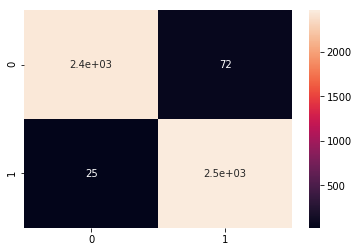

In [50]:
cm=confusion_matrix(preds,y_test)
import seaborn as sns
sns.heatmap(annot=True,data=cm)

In [58]:
accuracy_score(preds,y_test)

0.9806

In [55]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, threshold = roc_curve(y_test, preds)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.show()